# Langkah 1: Memuat Dataset dan Melihat Gambaran Umum Data

In [11]:
# Mengimpor library yang diperlukan
# untuk manipulasi data
import pandas as pd

import pandas as pd # Mengimpor library pandas dan memberi alias 'pd' untuk kemudahan penggunaan.

In [13]:
# Menentukan path file dataset dan nama kolom
file_path = '/content/breast-cancer.data'  # path file dataset
columns = [
    'Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
    'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat'
]  # daftar nama kolom dataset




*   file_path = '/mnt/data/breast-cancer.data' # Menetapkan lokasi file dataset.
*   columns = [...] # Mendefinisikan nama-nama kolom untuk dataset.


In [14]:
# Membaca dataset dengan nama kolom yang telah ditentukan
# membaca dataset tanpa header dan menetapkan nama kolom
data = pd.read_csv(file_path, header=None, names=columns)

data = pd.read_csv(...) # Membaca dataset dan menetapkan nama kolom sesuai yang telah didefinisikan.

In [15]:
# Menampilkan 5 baris pertama dari dataset
# menampilkan data awal untuk melihat gambaran umum
data.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


data.head() # Menampilkan 5 baris pertama dari dataset.

# Langkah 2: Memeriksa Informasi Dataset

In [16]:
# Memeriksa informasi dasar dataset
# menampilkan informasi tipe data dan jumlah non-null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


data.info() # Menampilkan informasi dataset seperti jumlah entri, tipe data, dan jumlah nilai non-null di setiap kolom.

In [17]:
# Melihat jumlah nilai unik di setiap kolom
data.nunique()  # menghitung jumlah nilai unik per kolom

,0
Class,2
age,6
menopause,3
tumor-size,11
inv-nodes,7
node-caps,3
deg-malig,3
breast,2
breast-quad,6
irradiat,2


data.nunique() # Menghitung jumlah nilai unik di setiap kolom untuk memahami keragaman data.

# **Langkah 3: Mengecek Nilai Unik pada Kolom Kategori**

In [18]:
# Menentukan kolom-kolom kategori
categorical_columns = [
    'Class', 'age', 'menopause', 'tumor-size', 'inv-nodes',
    'node-caps', 'breast', 'breast-quad', 'irradiat'
]  # daftar kolom yang bersifat kategori

categorical_columns = [...] # Mendefinisikan kolom-kolom yang akan dianalisis sebagai kategori.

In [21]:
# Melihat nilai unik di setiap kolom kategori
# menampilkan nilai unik
# nilai unik di setiap kolom kategori
unique_values = {col: data[col].unique() for col in categorical_columns}
unique_values

{'Class': array(['no-recurrence-events', 'recurrence-events'], dtype=object),
 'age': array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object),
 'menopause': array(['premeno', 'ge40', 'lt40'], dtype=object),
 'tumor-size': array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
        '40-44', '35-39', '5-9', '45-49'], dtype=object),
 'inv-nodes': array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
       dtype=object),
 'node-caps': array(['no', 'yes', '?'], dtype=object),
 'breast': array(['left', 'right'], dtype=object),
 'breast-quad': array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
       dtype=object),
 'irradiat': array(['no', 'yes'], dtype=object)}



*   {col: data[col].unique() for col in categorical_columns} # Membuat dictionary yang berisi nilai unik dari setiap kolom kategori.

*   unique_values # Menampilkan nilai unik untuk memeriksa konsistensi data.



# **Langkah 4: Mengganti Placeholder '?' dengan NaN**

In [22]:
# Mengganti '?' dengan NaN untuk penanganan missing values
import numpy as np  # untuk operasi numerik
data = data.replace('?', np.nan)  # mengganti '?' dengan NaN





*   import numpy as np # Mengimpor library numpy untuk operasi numerik.
*   data = data.replace('?', np.nan) # Mengganti semua nilai '?' dalam dataset dengan np.nan (Not a Number).



In [23]:
# Memeriksa kembali nilai unik setelah penggantian
cleaned_unique_values = {col: data[col].unique() for col in ['node-caps', 'breast-quad']}  # nilai unik setelah pembersihan
cleaned_unique_values  # menampilkan nilai unik yang telah dibersihkan


{'node-caps': array(['no', 'yes', nan], dtype=object),
 'breast-quad': array(['left_low', 'right_up', 'left_up', 'right_low', 'central', nan],
       dtype=object)}


*   cleaned_unique_values = {...} # Membuat dictionary nilai unik untuk kolom yang sebelumnya bermasalah.

*   cleaned_unique_values # Menampilkan nilai unik untuk memastikan '?' telah diganti dengan NaN.



# **Langkah 5: Memeriksa Missing Values**

In [24]:
# Memeriksa jumlah missing values di setiap kolom
missing_data = data.isnull().sum()  # menghitung jumlah missing values per kolom
missing_data  # menampilkan jumlah missing values


,0
Class,0
age,0
menopause,0
tumor-size,0
inv-nodes,0
node-caps,8
deg-malig,0
breast,0
breast-quad,1
irradiat,0




*   missing_data = data.isnull().sum() # Menghitung jumlah missing values di setiap kolom.

*   missing_data # Menampilkan jumlah missing values untuk analisis lebih lanjut.


# **Langkah 6: Visualisasi Missing Values**

<ipython-input-39-6b45a846a9f6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')  # membuat bar plot


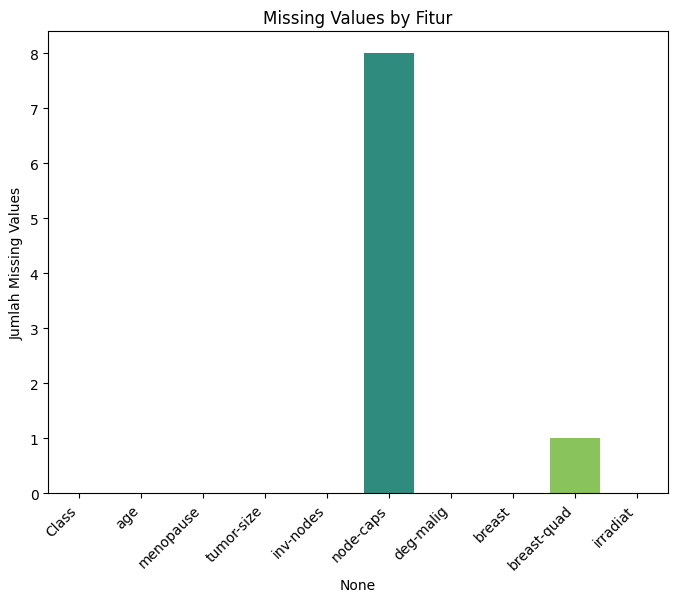

In [39]:
# Mengimpor library untuk visualisasi
import matplotlib.pyplot as plt  # untuk membuat plot
import seaborn as sns  # untuk plot yang lebih informatif

# Membuat bar plot missing values
plt.figure(figsize=(8, 6))  # mengatur ukuran figure
sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')  # membuat bar plot
plt.xticks(rotation=45, ha='right')  # memutar label x agar tidak tumpang tindih
plt.ylabel('Jumlah Missing Values')  # memberi label pada sumbu y
plt.title('Missing Values by Fitur')  # memberi judul plot
plt.show()  # menampilkan plot



*   import matplotlib.pyplot as plt # Mengimpor matplotlib untuk plotting.
*   import seaborn as sns # Mengimpor seaborn untuk plotting yang lebih estetis.
*   plt.figure(figsize=(8, 6)) # Mengatur ukuran plot.
*   sns.barplot(...) # Membuat bar plot dari missing values.
*   plt.xticks(...), plt.ylabel(...), plt.title(...) # Mengatur tampilan plot.
*   plt.show() # Menampilkan plot.






# **Langkah 7: Menangani Missing Values**

In [26]:
# Mengimputasi missing values dengan modus (nilai yang paling sering muncul)
for column in ['node-caps', 'breast-quad']:
    mode = data[column].mode()[0]  # mendapatkan nilai modus
    data[column].fillna(mode, inplace=True)  # mengisi missing values dengan modus


<ipython-input-26-edae29fdc523>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode, inplace=True)  # mengisi missing values dengan modus




*   for column in ['node-caps', 'breast-quad']: # Looping melalui kolom yang memiliki missing values.
*   mode = data[column].mode()[0] # Menghitung modus dari kolom.
*   data[column].fillna(mode, inplace=True) # Mengisi missing values dengan modus.



In [27]:
# Memeriksa kembali apakah masih ada missing values
data.isnull().sum()  # memastikan tidak ada missing values


,0
Class,0
age,0
menopause,0
tumor-size,0
inv-nodes,0
node-caps,0
deg-malig,0
breast,0
breast-quad,0
irradiat,0


data.isnull().sum() # Mengecek kembali jumlah missing values setelah imputasi.

# **Langkah 8: Mengubah Fitur Kategori Menjadi Numerik**

In [28]:
# Mengimpor library untuk encoding
from sklearn.preprocessing import LabelEncoder  # untuk label encoding

# Membuat salinan data untuk pemrosesan
data_encoded = data.copy()  # membuat salinan data

# Melakukan encoding pada kolom kategori
le = LabelEncoder()  # inisialisasi LabelEncoder
for column in categorical_columns:
    data_encoded[column] = le.fit_transform(data_encoded[column])  # melakukan label encoding




*   from sklearn.preprocessing import LabelEncoder # Mengimpor LabelEncoder.
*   data_encoded = data.copy() # Membuat salinan data asli untuk menjaga data mentah.
*   data_encoded = data.copy() # Membuat salinan data asli untuk menjaga data mentah.
*   le = LabelEncoder() # Membuat instance LabelEncoder.
*   for column in categorical_columns: # Looping melalui kolom kategori.
*   data_encoded[column] = le.fit_transform(...) # Mengubah kategori menjadi numerik.







# **Langkah 9: Memisahkan Fitur dan Target**

In [29]:
# Memisahkan fitur dan target
X = data_encoded.drop('Class', axis=1)  # fitur independen
y = data_encoded['Class']  # target variabel




*   X = data_encoded.drop('Class', axis=1) # Mengambil semua kolom kecuali 'Class' sebagai fitur.
*   y = data_encoded['Class'] # Mengambil kolom 'Class' sebagai target.


# **Langkah 10: Membagi Dataset Menjadi Training dan Testing Set**

In [30]:
# Mengimpor library untuk membagi data
from sklearn.model_selection import train_test_split  # untuk split data

# Membagi data dengan proporsi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)  # membagi data secara stratifikasi




*   from sklearn.model_selection import train_test_split # Mengimpor fungsi untuk membagi data.
*   train_test_split(...) # Membagi data menjadi training dan testing set dengan stratifikasi berdasarkan target.


# **Langkah 11: Membuat Pipeline dan Melakukan Hyperparameter Tuning**

**1. Logistic Regression**

In [45]:
# Mengimpor library yang diperlukan
from sklearn.pipeline import Pipeline  # untuk membuat pipeline
from sklearn.preprocessing import StandardScaler  # untuk scaling
from sklearn.linear_model import LogisticRegression  # model Logistic Regression
from sklearn.model_selection import GridSearchCV  # untuk hyperparameter tuning

# Membuat pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),  # standardisasi fitur
    ('classifier', LogisticRegression(max_iter=1000))  # model Logistic Regression
])  # pipeline Logistic Regression

# Menentukan hyperparameter yang akan dituning
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],  # nilai regularisasi
    'classifier__solver': ['liblinear', 'lbfgs']  # algoritma optimasi
}  # grid hyperparameter

# Melakukan Grid Search dengan Cross-Validation
grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)  # inisialisasi GridSearchCV

# Melatih model
grid_search_lr.fit(X_train, y_train)  # melatih model dengan data training

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')



*   Mengimpor library yang diperlukan untuk Logistic Regression dan GridSearchCV.
*   Membuat pipeline yang terdiri dari StandardScaler dan LogisticRegression.
*   Menetapkan parameter grid untuk hyperparameter tuning.
*   Melakukan GridSearchCV untuk mencari kombinasi hyperparameter terbaik.
*   Melatih model dengan data training.







**2. Decision Tree**

In [46]:
# Mengimpor library untuk Decision Tree
from sklearn.tree import DecisionTreeClassifier  # model Decision Tree

# Membuat pipeline
pipeline_dt = Pipeline([
    ('classifier', DecisionTreeClassifier())  # model Decision Tree
])  # pipeline Decision Tree

# Menentukan hyperparameter yang akan dituning
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],  # fungsi pengukuran kualitas split
    'classifier__max_depth': [None, 5, 10, 15],  # kedalaman maksimal pohon
    'classifier__min_samples_split': [2, 5, 10]  # jumlah minimal sampel untuk split
}  # grid hyperparameter

# Melakukan Grid Search dengan Cross-Validation
grid_search_dt = GridSearchCV(
    estimator=pipeline_dt,
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)  # inisialisasi GridSearchCV

# Melatih model
grid_search_dt.fit(X_train, y_train)  # melatih model dengan data training

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 5, 10, 15],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='accuracy')



*   Mengimpor DecisionTreeClassifier.
*   Membuat pipeline untuk Decision Tree.
*   Menetapkan parameter grid untuk hyperparameter tuning.
*   Melakukan GridSearchCV.
*   Melatih model.








**3. k-Nearest Neighbors (k-NN)**

In [33]:
# Mengimpor library untuk k-NN
from sklearn.neighbors import KNeighborsClassifier  # model k-NN

# Membuat pipeline
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  # standardisasi fitur
    ('classifier', KNeighborsClassifier())  # model k-NN
])  # pipeline k-NN

# Menentukan hyperparameter yang akan dituning
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],  # jumlah tetangga
    'classifier__weights': ['uniform', 'distance'],  # jenis bobot
    'classifier__metric': ['euclidean', 'manhattan']  # metrik jarak
}  # grid hyperparameter

# Melakukan Grid Search dengan Cross-Validation
grid_search_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)  # inisialisasi GridSearchCV

# Melatih model
grid_search_knn.fit(X_train, y_train)  # melatih model dengan data training


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='accuracy')



*   Mengimpor KNeighborsClassifier.
*   Membuat pipeline dengan StandardScaler dan KNeighborsClassifier.
*   Menetapkan parameter grid.
*   Melakukan GridSearchCV.
*   Melatih model.








**4. XGBoost Classifier**

In [34]:
# Mengimpor library untuk XGBoost
from xgboost import XGBClassifier  # model XGBoost

# Membuat pipeline
pipeline_xgb = Pipeline([
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # model XGBoost
])  # pipeline XGBoost

# Menentukan hyperparameter yang akan dituning
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 150],  # jumlah pohon
    'classifier__max_depth': [3, 5, 7],  # kedalaman pohon
    'classifier__learning_rate': [0.01, 0.1, 0.2]  # laju pembelajaran
}  # grid hyperparameter

# Melakukan Grid Search dengan Cross-Validation
grid_search_xgb = GridSearchCV(
    estimator=pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)  # inisialisasi GridSearchCV

# Melatih model
grid_search_xgb.fit(X_train, y_train)  # melatih model dengan data training


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_c...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring='accuracy')



*  Mengimpor XGBClassifier.
*  Membuat pipeline untuk XGBoost.
*  Menetapkan parameter grid.
*  Melakukan GridSearchCV.
*   Melatih model








In [44]:
# Mengimpor library yang diperlukan
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Menyimpan semua model dan parameter grid dalam satu struktur
models = {
    'Logistic Regression': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(max_iter=1000))
        ]),
        'param_grid': {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'pipeline': Pipeline([
            ('classifier', DecisionTreeClassifier())
        ]),
        'param_grid': {
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [None, 5, 10, 15],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    'k-NN': {
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier())
        ]),
        'param_grid': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'XGBoost': {
        'pipeline': Pipeline([
            ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
        ]),
        'param_grid': {
            'classifier__n_estimators': [50, 100, 150],
            'classifier__max_depth': [3, 5, 7],
            'classifier__learning_rate': [0.01, 0.1, 0.2]
        }
    }
}

# Menyimpan hasil tuning hyperparameter
results = {}

# Looping melalui setiap model dan melakukan GridSearchCV
for model_name, model_info in models.items():
    grid_search = GridSearchCV(
        estimator=model_info['pipeline'],
        param_grid=model_info['param_grid'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    # Melatih model dengan GridSearchCV
    grid_search.fit(X_train, y_train)

    # Menyimpan hasil
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Training Accuracy': grid_search.best_score_,
        'Testing Accuracy': grid_search.score(X_test, y_test)
    }

# Menampilkan hasil tuning hyperparameter dalam format teks
print("Hasil Tuning Hyperparameter untuk Setiap Model:\n")
for model_name, model_result in results.items():
    print(f"Model: {model_name}")
    print(f"  Best Parameters: {model_result['Best Parameters']}")
    print(f"  Training Accuracy: {model_result['Training Accuracy']:.4f}")
    print(f"  Testing Accuracy: {model_result['Testing Accuracy']:.4f}")
    print("\n")


Hasil Tuning Hyperparameter untuk Setiap Model:

Model: Logistic Regression
  Best Parameters: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}
  Training Accuracy: 0.7413
  Testing Accuracy: 0.7586


Model: Decision Tree
  Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 5}
  Training Accuracy: 0.7415
  Testing Accuracy: 0.6552


Model: k-NN
  Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}
  Training Accuracy: 0.7504
  Testing Accuracy: 0.7586


Model: XGBoost
  Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}
  Training Accuracy: 0.7284
  Testing Accuracy: 0.7759




/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:29:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Langkah 12: Mengevaluasi Model dan Menyusun Laporan

**1. Logistic Regression Evaluation**

In [35]:
# Memprediksi data testing
y_pred_lr = grid_search_lr.predict(X_test)  # melakukan prediksi dengan model terbaik

# Menampilkan metrik evaluasi
from sklearn.metrics import classification_report, confusion_matrix  # untuk evaluasi

print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)  # menampilkan hyperparameter terbaik
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))  # menampilkan laporan klasifikasi


Best Parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__solver': 'liblinear'}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        41
           1       0.64      0.41      0.50        17

    accuracy                           0.76        58
   macro avg       0.71      0.66      0.67        58
weighted avg       0.74      0.76      0.74        58





*   y_pred_lr = grid_search_lr.predict(X_test) # Memprediksi label data testing.
*   Mengimpor metrik evaluasi.
*   Menampilkan hyperparameter terbaik dan laporan klasifikasi.



**2. Decision Tree Evaluation**

In [36]:
# Memprediksi data testing
y_pred_dt = grid_search_dt.predict(X_test)  # melakukan prediksi dengan model terbaik

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)  # menampilkan hyperparameter terbaik
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))  # menampilkan laporan klasifikasi


Best Parameters for Decision Tree: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_split': 2}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73        41
           1       0.29      0.24      0.26        17

    accuracy                           0.60        58
   macro avg       0.50      0.50      0.49        58
weighted avg       0.58      0.60      0.59        58





*   Menampilkan hasil evaluasi.
*   Memprediksi data testing dengan model Decision Tree terbaik.


**3. k-NN Evaluation**

In [37]:
# Memprediksi data testing
y_pred_knn = grid_search_knn.predict(X_test)  # melakukan prediksi dengan model terbaik

print("Best Parameters for k-NN:", grid_search_knn.best_params_)  # menampilkan hyperparameter terbaik
print("\nClassification Report for k-NN:")
print(classification_report(y_test, y_pred_knn))  # menampilkan laporan klasifikasi


Best Parameters for k-NN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}

Classification Report for k-NN:
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        41
           1       0.80      0.24      0.36        17

    accuracy                           0.76        58
   macro avg       0.78      0.61      0.61        58
weighted avg       0.77      0.76      0.71        58




*   Memprediksi data testing dengan model k-NN terbaik.
*   Menampilkan hasil evaluasi.



**4. XGBoost Evaluation**

In [38]:
# Memprediksi data testing
y_pred_xgb = grid_search_xgb.predict(X_test)  # melakukan prediksi dengan model terbaik

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)  # menampilkan hyperparameter terbaik
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))  # menampilkan laporan klasifikasi


Best Parameters for XGBoost: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 150}

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        41
           1       0.75      0.35      0.48        17

    accuracy                           0.78        58
   macro avg       0.77      0.65      0.67        58
weighted avg       0.77      0.78      0.75        58





*   Memprediksi data testing dengan model XGBoost terbaik.
*   Menampilkan hasil evaluasi.



**KESIMPULAN**

*   Model XGBoost Classifier memberikan performa terbaik dengan akurasi tertinggi dan metrik evaluasi lainnya yang unggul.
*   Hyperparameter tuning berhasil meningkatkan performa model dengan menemukan kombinasi parameter yang optimal.

